# Import 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df_brut = pd.read_csv ('dataimoreg.csv')

In [35]:
df_brut

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


# EDA 12/01


In [36]:
#first quick view 
df_brut.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [37]:
#first quick view for types
df_brut.dtypes

Unnamed: 0              int64
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [38]:
df_brut.isna().sum()

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [39]:
#Inputation of missing value by the median 
median = df_brut["total_bedrooms"].median()
df_brut['total_bedrooms'].fillna(median, inplace=True)

In [40]:
df_brut.isna().sum()

Unnamed: 0            0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [41]:
df_brut.nunique()

Unnamed: 0            16512
longitude               828
latitude                840
housing_median_age       52
total_rooms            5496
total_bedrooms         1828
population             3658
households             1709
median_income         10900
median_house_value     3688
ocean_proximity           5
dtype: int64

In [42]:
cols = ["longitude","latitude"]
df_brut["longitude,latitude"] = df_brut[cols].apply(lambda row: ' ; '.join(row.values.astype(str)), axis=1)

In [43]:
def ocean_proximity_to_num (row):
    if row["ocean_proximity"] == '<1H OCEAN' :
        return 0
    if row["ocean_proximity"] == 'INLAND' :
        return 1
    if row["ocean_proximity"] == 'NEAR OCEAN' :
        return 2
    if row["ocean_proximity"] == 'NEAR BAY' :
        return 3
    if row["ocean_proximity"] == 'ISLAND' :
        return 4
    return "NaN"

In [44]:
def num_to_ocean_proximity (row):
    if row["num_ocean_proximity"] == 0 :
        return '<1H OCEAN'
    if row["num_ocean_proximity"] == 1 :
        return 'INLAND'
    if row["num_ocean_proximity"] == 2 :
        return 'NEAR OCEAN'
    if row["num_ocean_proximity"] == 3 :
        return 'NEAR BAY'
    if row["num_ocean_proximity"] == 4 :
        return 'ISLAND'
    return "NaN"

In [45]:
df_brut["num_ocean_proximity"] = df_brut.apply (lambda row: ocean_proximity_to_num(row),axis=1)


In [46]:
df_brut["ocean_proximity"].value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [47]:
df_brut["num_ocean_proximity"].value_counts()

0    7312
1    5235
2    2140
3    1821
4       4
Name: num_ocean_proximity, dtype: int64

In [48]:
df_brut

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,"longitude,latitude",num_ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,-119.84 ; 36.77,1
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,-117.8 ; 33.68,0
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,-120.19 ; 36.6,1
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,-118.32 ; 34.1,0
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,-121.23 ; 37.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,-121.9 ; 39.59,1
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,-122.25 ; 38.11,3
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,-121.22 ; 38.92,1
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,-118.14 ; 34.16,0


In [49]:
df_duplicate = df_brut[df_brut["longitude,latitude"].duplicated(keep=False)]

In [50]:
df_duplicate.sort_values("longitude,latitude")

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,"longitude,latitude",num_ocean_proximity
1438,2695,-115.37,32.81,23.0,1458.0,294.0,866.0,275.0,2.3594,74300.0,INLAND,-115.37 ; 32.81,1
11563,2700,-115.37,32.81,32.0,741.0,191.0,623.0,169.0,1.7604,68600.0,INLAND,-115.37 ; 32.81,1
11750,2696,-115.37,32.82,14.0,1276.0,270.0,867.0,261.0,1.9375,80900.0,INLAND,-115.37 ; 32.82,1
9183,2697,-115.37,32.82,30.0,1602.0,322.0,1130.0,335.0,3.5735,71100.0,INLAND,-115.37 ; 32.82,1
6438,2691,-115.52,32.97,10.0,1879.0,387.0,1376.0,337.0,1.9911,67500.0,INLAND,-115.52 ; 32.97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2542,-124.17,40.80,52.0,1557.0,344.0,758.0,319.0,1.8529,62500.0,NEAR OCEAN,-124.17 ; 40.8,2
3625,2553,-124.18,40.78,37.0,1453.0,293.0,867.0,310.0,2.5536,70200.0,NEAR OCEAN,-124.18 ; 40.78,2
4808,2554,-124.18,40.78,33.0,1076.0,222.0,656.0,236.0,2.5096,72200.0,NEAR OCEAN,-124.18 ; 40.78,2
393,2547,-124.18,40.79,39.0,1836.0,352.0,883.0,337.0,1.7450,70500.0,NEAR OCEAN,-124.18 ; 40.79,2


In [51]:
df_test = df_duplicate.groupby(['longitude,latitude']).mean().reset_index()


In [52]:
df_clean = df_brut.groupby(['longitude,latitude']).mean().reset_index()
#df_clean = df_clean.drop(columns=['Unnamed: 0',"longitude","latitude"])
df_clean["ocean_proximity"] = df_clean.apply (lambda row: num_to_ocean_proximity(row),axis=1)

In [53]:
df_clean['longitude,latitude'].nunique()

10831

In [54]:
df_clean

,"longitude,latitude",Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,num_ocean_proximity,ocean_proximity
0,-114.31 ; 34.19,13924.0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,1.0,INLAND
1,-114.49 ; 33.97,12447.0,-114.49,33.97,17.0,2809.0,635.0,83.0,45.0,1.6154,87500.0,1.0,INLAND
2,-114.55 ; 32.8,2780.0,-114.55,32.80,19.0,2570.0,820.0,1431.0,608.0,1.2750,56100.0,1.0,INLAND
3,-114.56 ; 33.69,12450.0,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,1.0,INLAND
4,-114.57 ; 33.52,12453.0,-114.57,33.52,27.0,173.0,35.0,117.0,34.0,2.0833,45000.0,1.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10826,-124.23 ; 40.81,2593.0,-124.23,40.81,52.0,1112.0,209.0,544.0,172.0,3.3462,50800.0,2.0,NEAR OCEAN
10827,-124.23 ; 41.75,1852.0,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,2.0,NEAR OCEAN
10828,-124.26 ; 40.58,2653.0,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,2.0,NEAR OCEAN
10829,-124.3 ; 41.8,1851.0,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,2.0,NEAR OCEAN


In [55]:
columns_numerical = df_clean.columns[1:8]
columns_numerical

Index(['Unnamed: 0', 'longitude', 'latitude', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population'],
      dtype='object')

In [56]:
df_clean.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,num_ocean_proximity
count,10831.000000,10831.000000,10831.000000,10831.000000,10831.000000,10831.000000,10831.000000,10831.000000,10831.000000,10831.000000,10831.000000
mean,10796.698702,-119.650559,35.848797,25.895930,2901.235401,567.293598,1506.637448,523.785964,3.982899,201421.537349,0.908134
std,6055.011836,2.036666,2.213416,11.717194,2490.508545,454.525338,1270.259889,412.936869,1.916451,115799.181411,0.918246
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,5.000000,2.000000,0.499900,14999.000000,0.000000
25%,5667.500000,-121.750000,33.960000,17.000000,1593.000000,319.916667,835.000000,297.166667,2.646150,112500.000000,0.000000
50%,11164.000000,-119.170000,35.100000,25.500000,2287.400000,456.000000,1221.000000,428.285714,3.633900,173400.000000,1.000000
75%,16159.000000,-117.960000,37.780000,34.666667,3388.250000,667.750000,1795.000000,623.500000,4.861750,259725.000000,1.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [57]:
df_clean.sort_values("population").tail(40)

,"longitude,latitude",Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,num_ocean_proximity,ocean_proximity
4973,-118.59 ; 34.47,9172.0,-118.59,34.47,5.0,538.0,98.0,8733.0,105.0,4.2391,154600.0,1.0,INLAND
8102,-121.73 ; 37.68,1010.0,-121.73,37.68,17.0,20354.0,3493.0,8768.0,3293.0,5.4496,238900.0,1.0,INLAND
8389,-121.86 ; 37.37,17770.0,-121.86,37.37,15.0,8162.0,2124.0,8793.0,2086.0,3.3306,210300.0,0.0,<1H OCEAN
846,-117.12 ; 33.49,12214.0,-117.12,33.49,4.0,21988.0,4055.0,8824.0,3252.0,3.9963,191100.0,0.0,<1H OCEAN
2570,-117.92 ; 33.98,6328.0,-117.92,33.98,10.0,16414.0,2919.0,8907.0,2714.0,6.1552,362500.0,0.0,<1H OCEAN
2486,-117.9 ; 34.02,6297.0,-117.90,34.02,15.0,14058.0,2486.0,8997.0,2497.0,5.0704,226200.0,0.0,<1H OCEAN
4756,-118.47 ; 34.23,3603.0,-118.47,34.23,22.0,8350.0,2717.0,9135.0,2452.0,2.5008,160000.0,0.0,<1H OCEAN
1301,-117.27 ; 33.68,12152.0,-117.27,33.68,8.0,26322.0,4072.0,9360.0,3361.0,5.3238,228900.0,0.0,<1H OCEAN
1041,-117.2 ; 33.58,12201.0,-117.20,33.58,2.0,30450.0,5033.0,9419.0,3197.0,4.5936,174300.0,0.0,<1H OCEAN
2171,-117.79 ; 34.02,6061.0,-117.79,34.02,5.0,18690.0,2862.0,9427.0,2777.0,6.4266,315600.0,0.0,<1H OCEAN


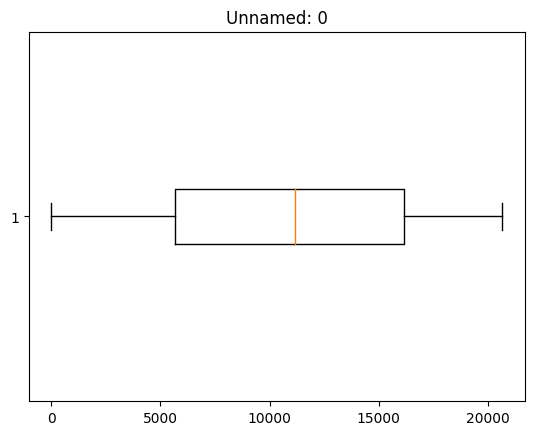

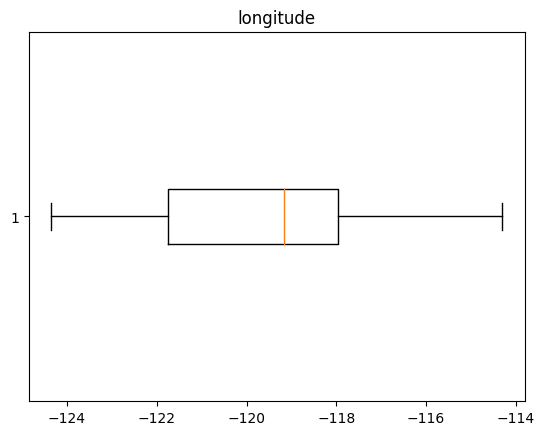

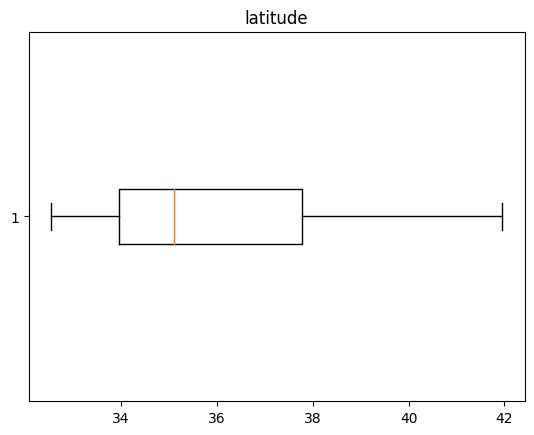

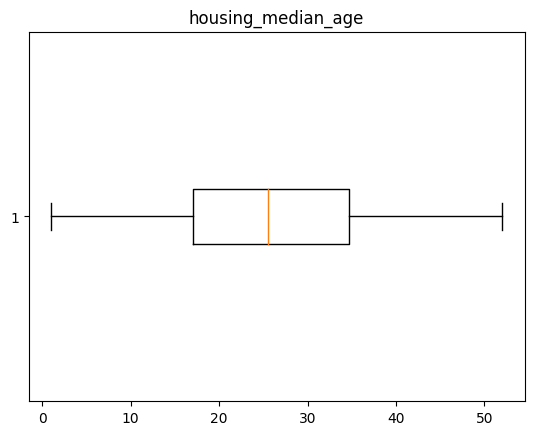

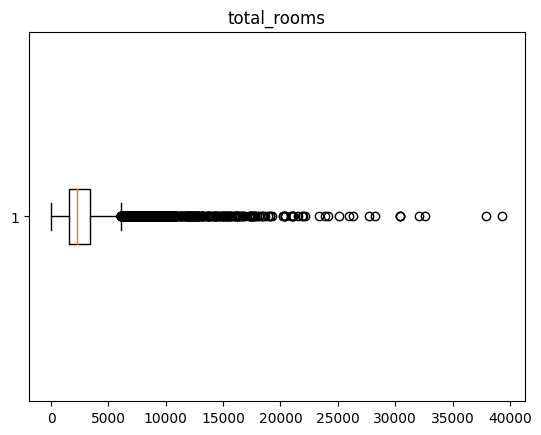

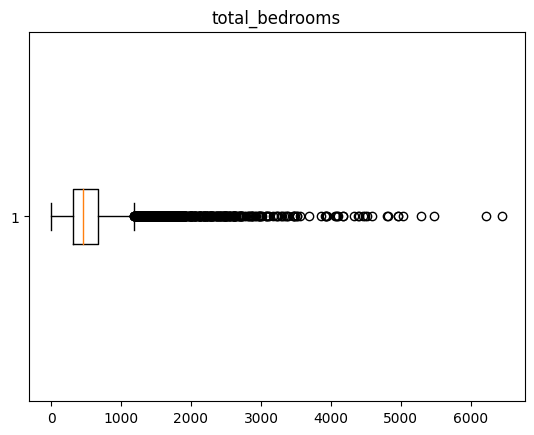

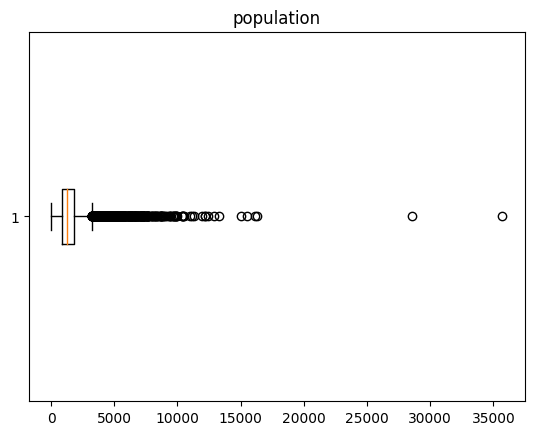

In [58]:

for i in columns_numerical :
    
    fig, ax = plt.subplots()
    ax.boxplot(df_clean[i], vert=0)
    plt.title(label=i)
   
    plt.show()

# inférence 12/01


<AxesSubplot:>

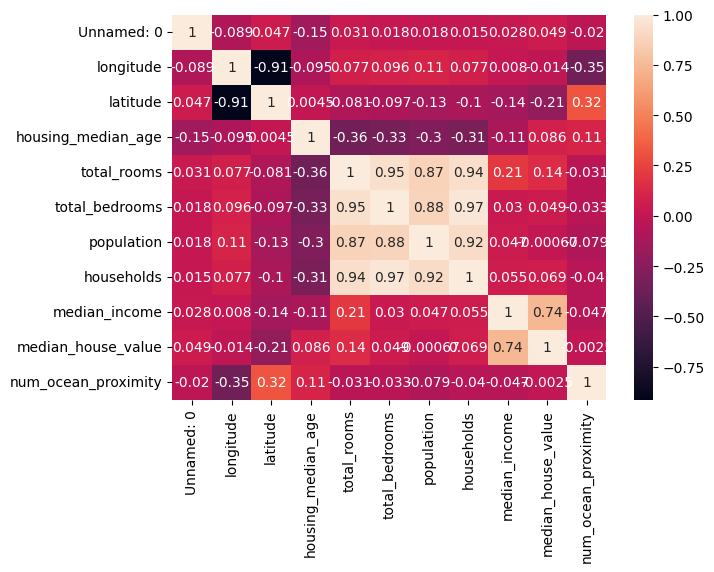

In [59]:
#We see that a few feature are heavy corraleted so we may remove them ? 
plt.figure(figsize=(7,5))
sns.heatmap(df_clean.corr(),annot=True)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'num_ocean_proximity'}>,
        <AxesSubplot:>]], dtype=object)

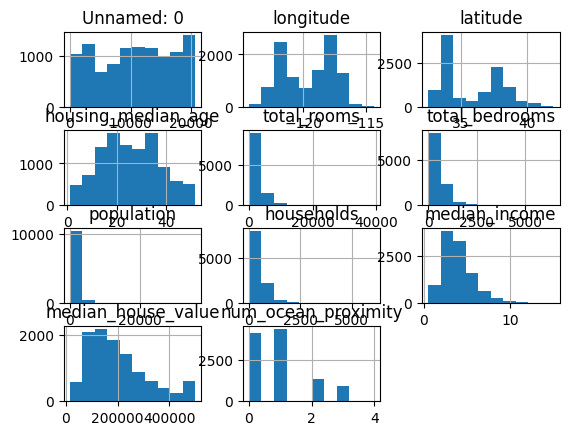

In [60]:
#Hist pour de l'analyse exploratoire et tres visuel sur loi normale ou non 
df_clean.hist()

# Baseline Model 12/01 


In [65]:
# Import the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Instanciate the model
model = LinearRegression()

In [66]:
df_clean.columns


Index(['longitude,latitude', 'Unnamed: 0', 'longitude', 'latitude',
       'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value',
       'num_ocean_proximity', 'ocean_proximity'],
      dtype='object')

In [78]:
# Choose your feature and your target
X = df_clean[['total_rooms', 'total_bedrooms', 'population',"households","median_income"]]
y = df_clean['median_house_value']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.5538099406840844